In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X, y = data['data'], data['target']
pca = PCA(n_components=4)
X = pca.fit_transform(X)
print(sum(pca.explained_variance_ratio_))

1.0


In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [7]:
def baseline_model(neurons):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
arr = np.zeros((20, 2))
nums = np.arange(20)
for num in nums:
    estimator = KerasClassifier(build_fn=baseline_model,neurons=num+1,epochs=200, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    arr[num][0]= num+1
    arr[num][1]= results.mean()*100
    print("Baseline: %.2f%% " % (results.mean()*100))

/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 82.67% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 95.33% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.67% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 97.33% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 97.33% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 97.33% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.67% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 97.33% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.67% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.67% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator KerasClassifier modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/home/lizanoskova/.local/lib/python2.7/site-packages/sklearn/base.py:115: DeprecationWarning: Estimator Keras

Baseline: 96.00% 


In [32]:
arr = np.rot90(arr, 3)

In [33]:
x = arr[0]
err = arr[1]
print(x)
print(err)

[20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.
  2.  1.]
[96.00000024 96.00000024 96.00000024 96.00000024 96.00000024 96.00000024
 96.00000024 96.00000024 96.00000024 96.00000024 96.66666687 96.66666687
 97.33333349 96.66666687 97.33333349 97.33333349 97.33333349 96.66666687
 95.33333361 82.66666725]


Text(0.5,1,'Dependency of Model quality \n on the number of hidden layer neurons')

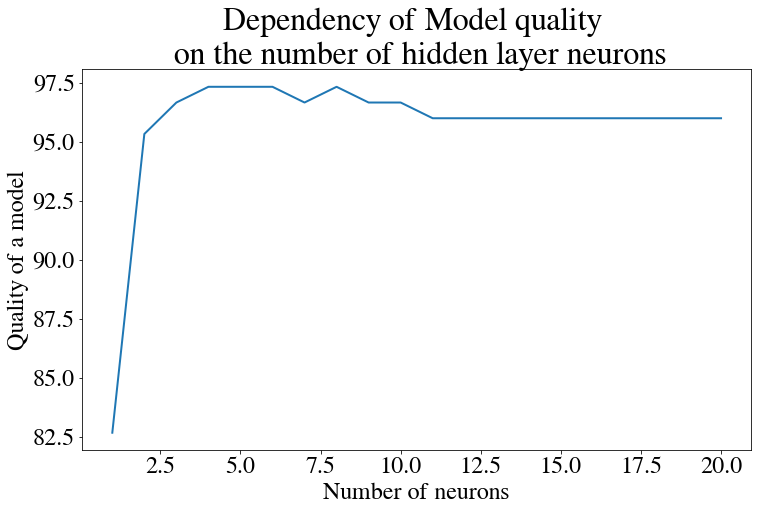

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(x, err)
plt.xlabel("Number of neurons")
plt.ylabel("Quality of a model")
plt.title("Dependency of Model quality \n on the number of hidden layer neurons")